# Analysis of Hospital Inpatient Discharges (SPARCS De-Identified): 2015

**Dataset Information**

The Statewide Planning and Research Cooperative System (SPARCS) Inpatient De-identified File contains discharge level detail on patient characteristics, diagnoses, treatments, services, and charges. This data file contains basic record level detail for the discharge. The de-identified data file does not contain data that is protected health information (PHI) under HIPAA. The health information is not individually identifiable; all data elements considered identifiable have been redacted. For example, the direct identifiers regarding a date have the day and month portion of the date removed.

https://www.kaggle.com/jonasalmeida/2015-deidentified-ny-inpatient-discharge-sparcs

There are 2346760 rows and 37 columns in the dataset.

The target is to **predict the length of stay** in the hospital.

**Importing the Libraries and the Dataset**

First step is to import the libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
import sweetviz as sw
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv')

In [3]:
df.head()

Health Service Area Hospital County  Operating Certificate Number  \
0          Western NY     Cattaraugus                      401001.0   
1          Western NY     Cattaraugus                      401001.0   
2          Western NY     Cattaraugus                      401001.0   
3          Western NY     Cattaraugus                      401001.0   
4          Western NY      Chautauqua                      602001.0   

   Facility Id                  Facility Name Age Group Zip Code - 3 digits  \
0         66.0         Olean General Hospital  50 to 69                 147   
1         66.0         Olean General Hospital  18 to 29                 147   
2         66.0         Olean General Hospital  30 to 49                 147   
3         66.0         Olean General Hospital  50 to 69                 147   
4        103.0  Woman's Christian Association  50 to 69                 147   

  Gender   Race          Ethnicity Length of Stay Type of Admission  \
0      F  White  Not Span/Hispanic              5         Emergency   
1      F  White  Not Span/Hispanic              8         Emergency   
2      M  White  Not Span/Hispanic              8         Emergency   
3      F  White  Not Span/Hispanic              4         Emergency   
4      M  White  Not Span/Hispanic              3         Emergency   

  Patient Disposition  Discharge Year  CCS Diagnosis Code  \
0   Home or Self Care            2015                 657   
1   Home or Self Care            2015                 657   
2   Home or Self Care            2015                 657   
3   Home or Self Care            2015                 128   
4   Home or Self Care            2015                  83   

  CCS Diagnosis Description  CCS Procedure Code CCS Procedure Description  \
0            Mood disorders                   0                   NO PROC   
1            Mood disorders                   0                   NO PROC   
2            Mood disorders                   0                   NO PROC   
3                    Asthma                   0                   NO PROC   
4     Epilepsy; convulsions                   0                   NO PROC   

   APR DRG Code APR DRG Description  APR MDC Code  \
0           753   Bipolar disorders            19   
1           753   Bipolar disorders            19   
2           753   Bipolar disorders            19   
3           141              Asthma             4   
4            53             Seizure             1   

                                APR MDC Description  \
0                     Mental Diseases and Disorders   
1                     Mental Diseases and Disorders   
2                     Mental Diseases and Disorders   
3  Diseases and Disorders of the Respiratory System   
4      Diseases and Disorders of the Nervous System   

   APR Severity of Illness Code APR Severity of Illness Description  \
0                             1                               Minor   
1                             2                            Moderate   
2                             1                               Minor   
3                             1                               Minor   
4                             2                            Moderate   

  APR Risk of Mortality APR Medical Surgical Description Payment Typology 1  \
0                 Minor                          Medical           Medicaid   
1                 Minor                          Medical           Medicaid   
2                 Minor                          Medical           Medicaid   
3                 Minor                          Medical           Medicare   
4              Moderate                          Medical           Medicaid   

  Payment Typology 2 Payment Typology 3  Attending Provider License Number  \
0                NaN                NaN                           267162.0   
1                NaN                NaN                           275408.0   
2                NaN                NaN                  

**Data Preprocessing**

In [4]:
df.shape

(2346760, 37)

The dataset has **37 columns** and **2346760 rows**, which are different cases in the NY state hospitals.

In [5]:
df.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346760 entries, 0 to 2346759
Data columns (total 37 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Health Service Area                  object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Facility Id                          float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       

In [7]:
df.isnull().sum()

Health Service Area                       2911
Hospital County                           2911
Operating Certificate Number              2911
Facility Id                               2911
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       4427
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

There are some/many null values in some columns. My decision is:

"Other Provider License Number", "Operating Provider License Number", "Payment Typology 3" and "Payment Typology 2" columns should be **dropped** due to the huge percentage of NaNs.

NaN values in the columns of "Health Service Area", "Hospital County", "Operating Certificate Number", "Facility Id", "Zip Code - 3 digits", "APR Severity of Illness Description", "APR Risk of Mortality" and "Attending Provider License Number" have an insignificant percentage in total, so they may be **dropped**.

In [8]:
df = df.drop(['Other Provider License Number','Payment Typology 2','Payment Typology 3','Operating Provider License Number'], axis=1)

In [9]:
df = df.dropna(subset=["APR Severity of Illness Description", "APR Risk of Mortality", "Attending Provider License Number"])

In [10]:
df = df.dropna(subset=['APR Severity of Illness Description', 'APR Risk of Mortality','Zip Code - 3 digits','Facility Id','Attending Provider License Number'])

In [11]:
df.isnull().sum()

Health Service Area                    0
Hospital County                        0
Operating Certificate Number           0
Facility Id                            0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mort

In [12]:
df.shape

(2342221, 33)


We just made sure that there are no more **NaN**s in the dataset.


Before going further, dtypes of the columns should be checked. Some of the columns have an **object** type although they represent numeric values. For "**Total Charges**" and "**Total Costs**" columns, there are **$** signs and those signs should be dealt with first.

Also, "**Length of Stay**", the target column should be converted to integer dtype.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342221 entries, 0 to 2346759
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Health Service Area                  object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Facility Id                          float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       

In [14]:
df['Total Costs'] = df['Total Costs'].apply(lambda x: str(x).replace('$',''))
df['Total Costs'] = pd.to_numeric(df['Total Costs'])
df['Total Charges'] = df['Total Charges'].apply(lambda x: str(x).replace('$',''))
df['Total Charges'] = pd.to_numeric(df['Total Charges'])

In [15]:
df['Length of Stay'] = df['Length of Stay'].apply(lambda x: str(x).split(' ')[0])
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'])

In [16]:
df['Length of Stay']=[each.replace("+","") if(each=="120 +") else each for each in df['Length of Stay']]

In [17]:
df["Length of Stay"]=df["Length of Stay"].astype('int')

In [ ]:
#plt.figure(figsize=(20,12))
#sns.countplot(data=df, x = 'Total Charges')

In [18]:
df.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                           int32
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

# Exploratory Data Analysis

In [19]:
for i in df.columns:
    print(i)
    print(df[i].value_counts(dropna=False))
    print('*'*33)

Health Service Area
New York City     1090826
Long Island        339240
Hudson Valley      245917
Capital/Adiron     167322
Western NY         163893
Central NY         158296
Finger Lakes       146558
Southern Tier       30169
Name: Health Service Area, dtype: int64
*********************************
Hospital County
Manhattan      399693
Kings          248927
Queens         197173
Bronx          188124
Nassau         181142
Suffolk        158098
Erie           120556
Westchester    119375
Monroe         105154
Onondaga        78374
Albany          65717
Richmond        56909
Orange          39500
Dutchess        32594
Rockland        31940
Oneida          29902
Broome          28525
Schenectady     22325
Niagara         17152
Warren          14090
Chemung         13845
Otsego          12265
Rensselaer      11957
Ontario         11950
Ulster          11359
St Lawrence     11106
Jefferson       10823
Chautauqua      10489
Clinton          9816
Saratoga         9237
Tompkins         7246


Neonate birthwt >2499g, normal newborn or neonate w other problem    197816
Vaginal delivery                                                     146636
Septicemia & disseminated infections                                  94929
Cesarean delivery                                                     75940
Heart failure                                                         56350
                                                                      ...  
Abortion w/o D&C, aspiration curettage or hysterotomy                    91
Neonate w ECMO                                                           53
Extensive 3rd degree burns w skin graft                                  43
Neonate, transferred <5 days old, not born here                          35
Pancreas transplant                                                      34
Name: APR DRG Description, Length: 314, dtype: int64
*********************************
APR MDC Code
5     289419
14    250907
15    231451
8     204551
6     197548

In [20]:
df['Length of Stay'].value_counts()

2      542347
3      424065
1      337195
4      247358
5      160530
        ...  
119        41
111        41
115        37
116        31
108        26
Name: Length of Stay, Length: 120, dtype: int64

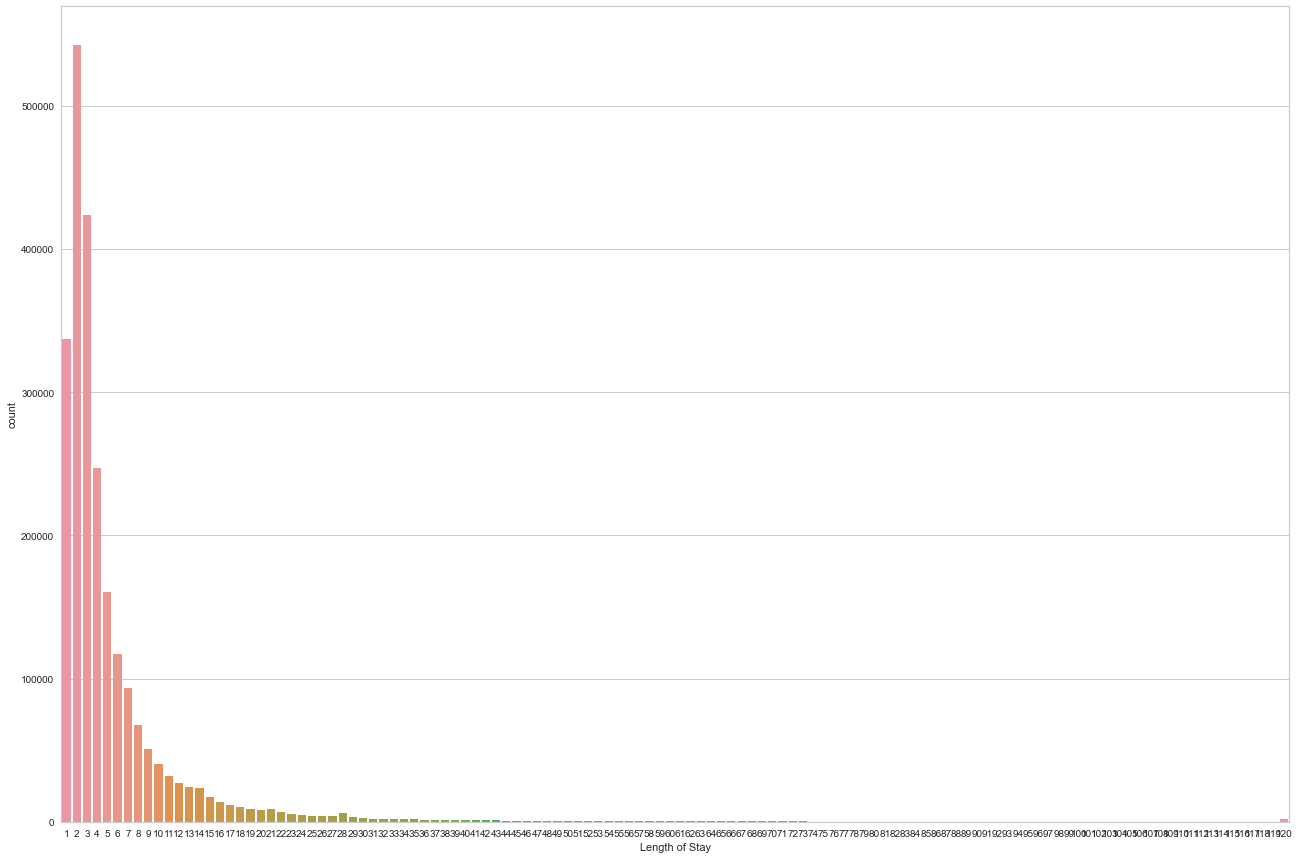

In [21]:
plt.figure(figsize=(22,15))
sns.countplot(x='Length of Stay', data = df);

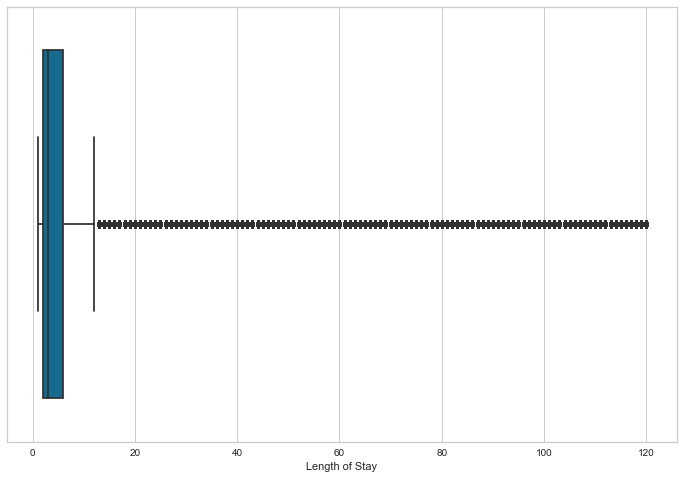

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Length of Stay']);

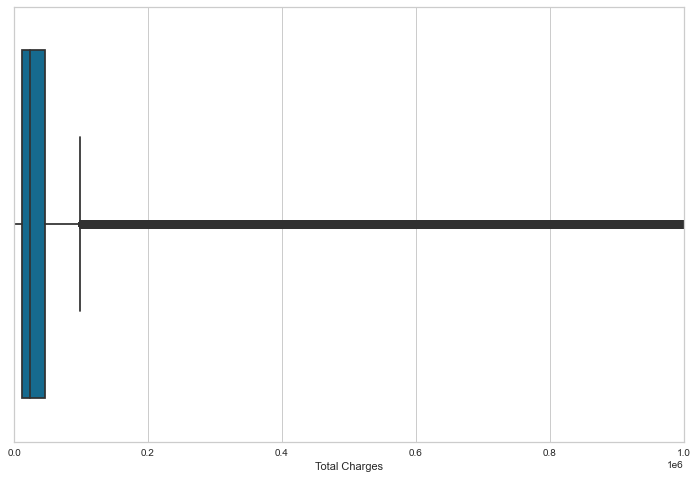

In [23]:
plt.figure(figsize=(12,8))
a = sns.boxplot(x=df['Total Charges'])
a.set(xlim=(0,1000000));

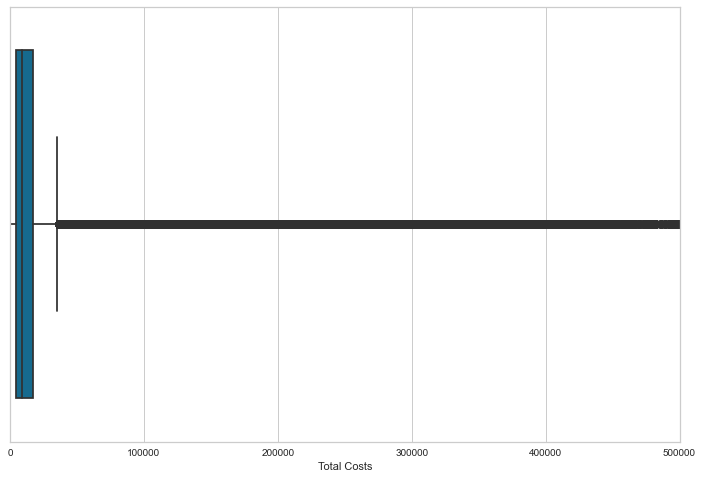

In [24]:
plt.figure(figsize=(12,8))
a=sns.boxplot(x=df['Total Costs'])
a.set(xlim=(0,500000));

In [25]:
df.describe().T

count          mean           std  \
Operating Certificate Number       2342221.0  5.006227e+06  2.259531e+06   
Facility Id                        2342221.0  1.043141e+03  7.135456e+02   
Length of Stay                     2342221.0  5.480060e+00  8.035354e+00   
Discharge Year                     2342221.0  2.015000e+03  0.000000e+00   
CCS Diagnosis Code                 2342221.0  1.905596e+02  1.597189e+02   
CCS Procedure Code                 2342221.0  1.127538e+02  8.897563e+01   
APR DRG Code                       2342221.0  4.178865e+02  2.414170e+02   
APR MDC Code                       2342221.0  1.042384e+01  5.926276e+00   
APR Severity of Illness Code       2342221.0  2.011237e+00  8.974071e-01   
Attending Provider License Number  2342221.0  2.176400e+06  1.201709e+07   
Birth Weight                       2342221.0  3.264818e+02  1.000243e+03   
Total Charges                      2342221.0  4.323095e+04  8.046165e+04   
Total Costs                        2342221.0  1.599223e+04  3.239425e+04   

                                         min         25%         50%  \
Operating Certificate Number       101000.00  2951001.00  5907001.00   
Facility Id                             1.00      541.00     1099.00   
Length of Stay                          1.00        2.00        3.00   
Discharge Year                       2015.00     2015.00     2015.00   
CCS Diagnosis Code                      1.00      106.00      158.00   
CCS Procedure Code                      0.00        0.00      132.00   
APR DRG Code                            1.00      200.00      383.00   
APR MDC Code                            1.00        5.00        9.00   
APR Severity of Illness Code            1.00        1.00        2.00   
Attending Provider License Number     615.00   192317.00   229495.00   
Birth Weight                            0.00        0.00        0.00   
Total Charges                           0.01    12033.86    23501.05   
Total Costs                             0.00     4725.78     8797.00   

                                          75%          max  
Operating Certificate Number       7002009.00   7004010.00  
Facility Id                           1450.00      9431.00  
Length of Stay                           6.00       120.00  
Discharge Year                        2015.00      2015.00  
CCS Diagnosis Code                     218.00       917.00  
CCS Procedure Code                     216.00       999.00  
APR DRG Code                           640.00       952.00  
APR MDC Code                            15.00        25.00  
APR Severity of Illness Code             3.00         4.00  
Attending Provider License Number   257910.00  90999999.00  
Birth Weight                             0.00      9900.00  
Total Charges                        46645.00   7248390.82  
Total Costs                          16844.66   5236614.76

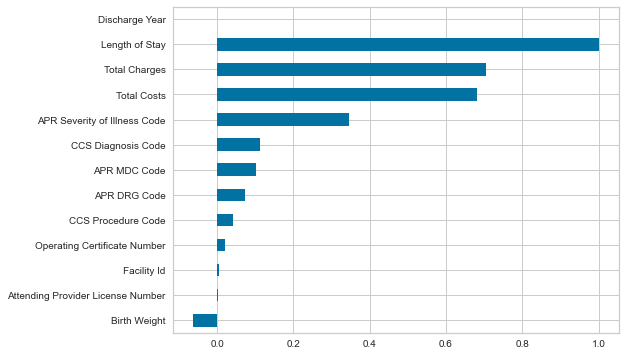

In [26]:
df.corr()['Length of Stay'].sort_values().plot.barh(figsize=(8,6));

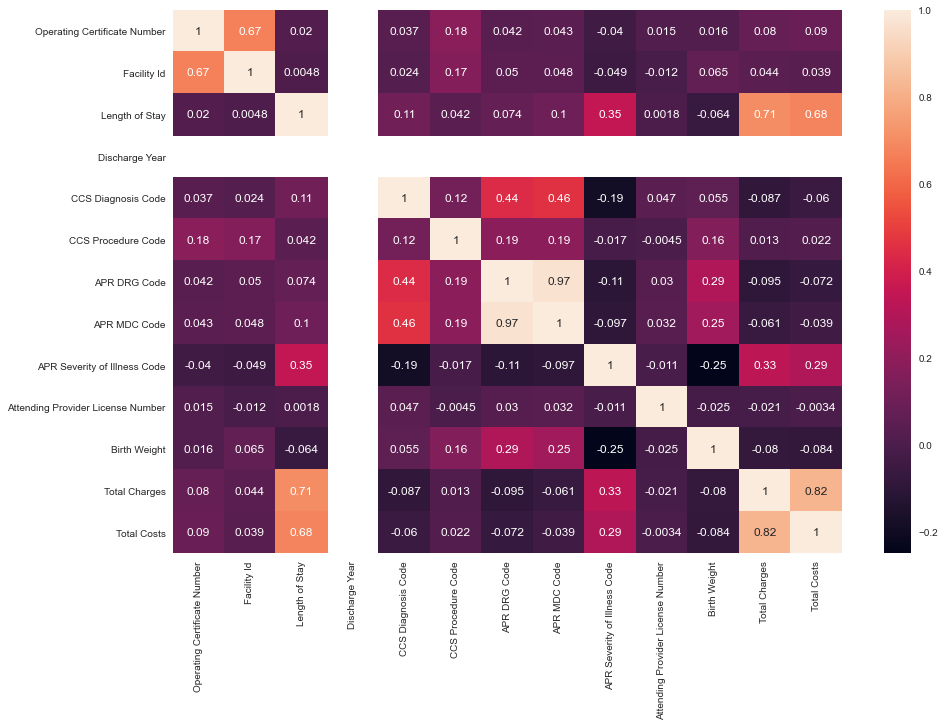

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True);

50 to 69       644774
70 or Older    643124
30 to 49       456448
0 to 17        352050
18 to 29       245825
Name: Age Group, dtype: int64

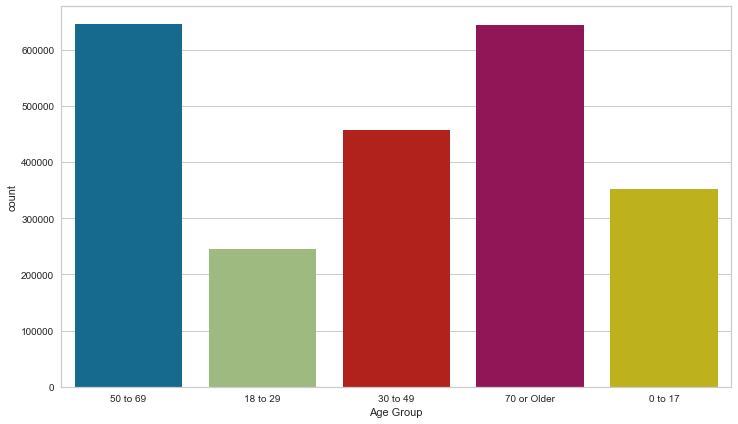

In [28]:
plt.figure(figsize=(12,7))
sns.countplot(x='Age Group', data = df);
df['Age Group'].value_counts()

F    1303589
M    1038593
U         39
Name: Gender, dtype: int64

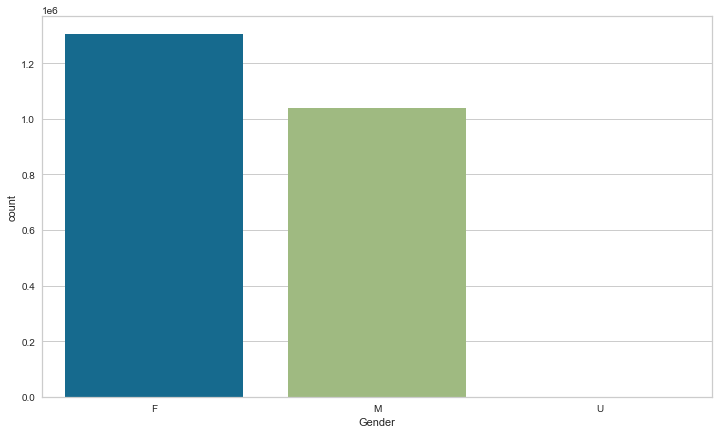

In [29]:
plt.figure(figsize=(12,7))
sns.countplot(x='Gender', data = df);
df.Gender.value_counts()

White                     1333050
Other Race                 543104
Black/African American     443817
Multi-racial                22250
Name: Race, dtype: int64

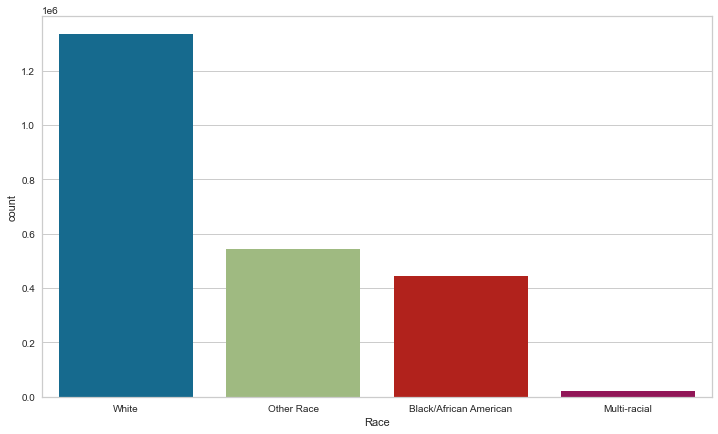

In [30]:
plt.figure(figsize=(12,7))
sns.countplot(x='Race', data = df);
df.Race.value_counts()

Not Span/Hispanic    1950947
Spanish/Hispanic      277819
Unknown               104801
Multi-ethnic            8654
Name: Ethnicity, dtype: int64

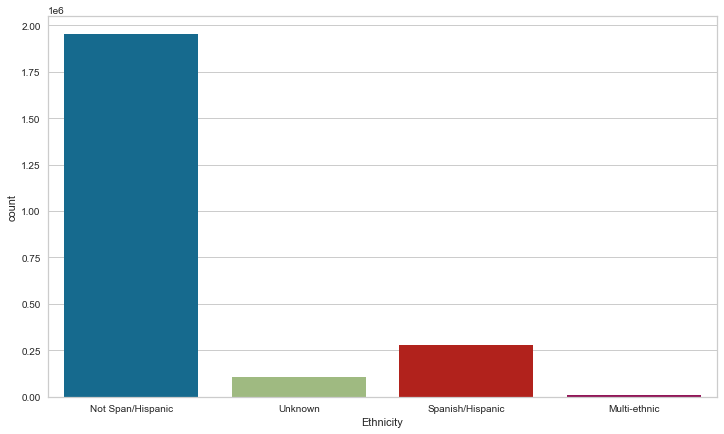

In [31]:
plt.figure(figsize=(12,7))
sns.countplot(x='Ethnicity', data = df);
df.Ethnicity.value_counts()

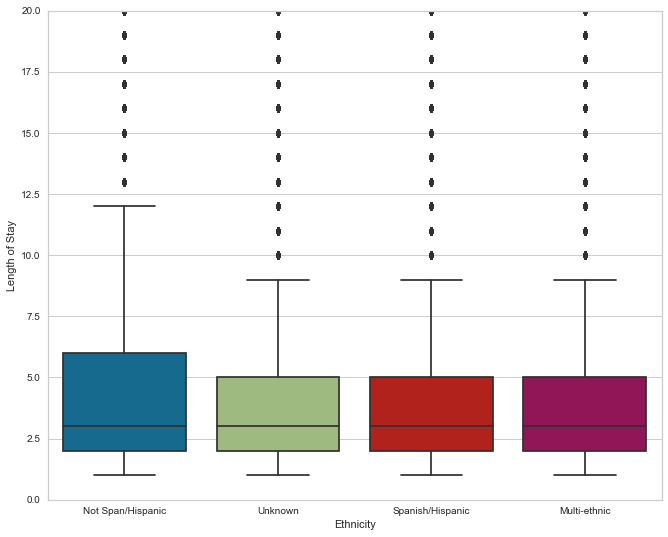

In [32]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Ethnicity", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 20));

Emergency        1485353
Elective          446428
Newborn           226682
Urgent            176196
Trauma              6392
Not Available       1170
Name: Type of Admission, dtype: int64

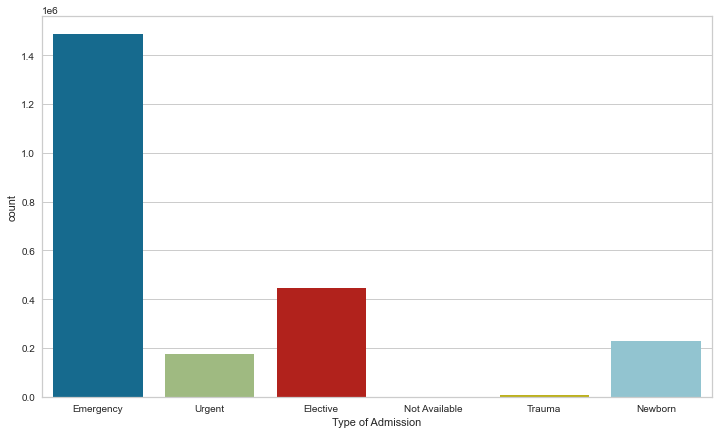

In [33]:
plt.figure(figsize=(12,7))
sns.countplot(x='Type of Admission', data = df);
df['Type of Admission'].value_counts()

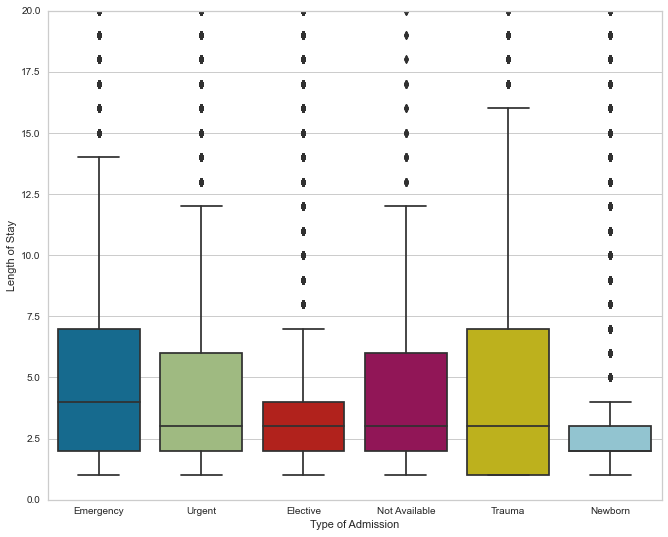

In [34]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Type of Admission", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 20));

Home or Self Care                        1568050
Home w/ Home Health Services              304155
Skilled Nursing Home                      223941
Expired                                    50958
Left Against Medical Advice                46998
Inpatient Rehabilitation Facility          44504
Short-term Hospital                        40468
Hospice - Medical Facility                 12656
Psychiatric Hospital or Unit of Hosp       12072
Hospice - Home                             10724
Another Type Not Listed                     8351
Facility w/ Custodial/Supportive Care       6678
Court/Law Enforcement                       3882
Medicare Cert Long Term Care Hospital       3445
Cancer Center or Children's Hospital        2906
Hosp Basd Medicare Approved Swing Bed       1547
Federal Health Care Facility                 621
Critical Access Hospital                     153
Medicaid Cert Nursing Facility               112
Name: Patient Disposition, dtype: int64

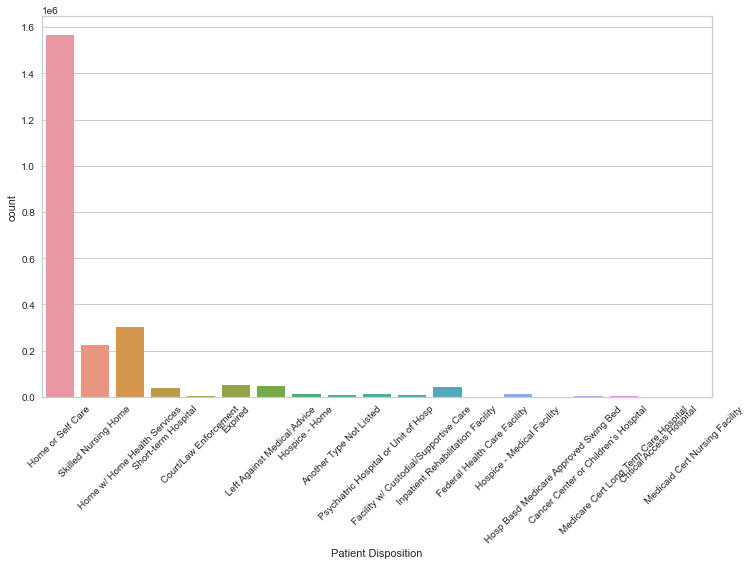

In [35]:
plt.figure(figsize=(12,7))
sns.countplot(x='Patient Disposition', data = df)
plt.xticks(rotation=45);
df['Patient Disposition'].value_counts()

2    895521
1    783503
3    516571
4    146626
Name: APR Severity of Illness Code, dtype: int64

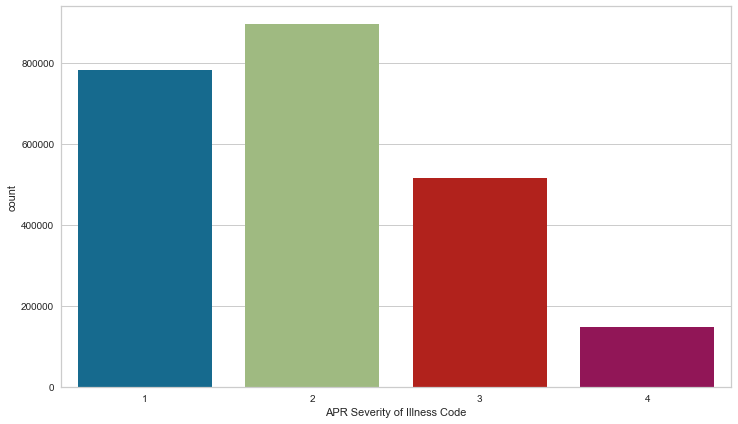

In [36]:
plt.figure(figsize=(12,7))
sns.countplot(x='APR Severity of Illness Code', data = df);
df['APR Severity of Illness Code'].value_counts()

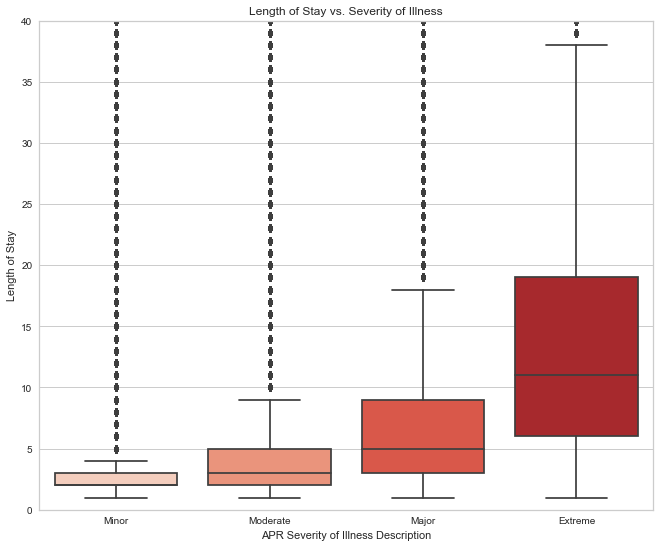

In [37]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="APR Severity of Illness Description", y="Length of Stay",
            data=df, palette='Reds')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. Severity of Illness')
plt.show()

Minor       1385860
Moderate     499685
Major        335013
Extreme      121663
Name: APR Risk of Mortality, dtype: int64

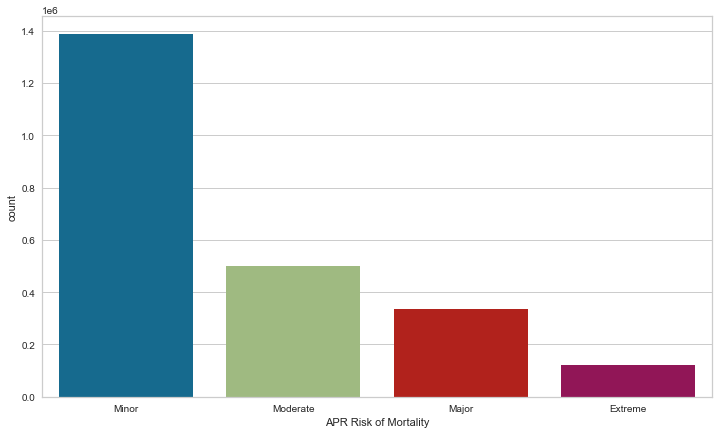

In [38]:
plt.figure(figsize=(12,7))
sns.countplot(x='APR Risk of Mortality', data = df);
df['APR Risk of Mortality'].value_counts()

Medicare                     875810
Medicaid                     715311
Private Health Insurance     333320
Blue Cross/Blue Shield       274930
Self-Pay                      67698
Miscellaneous/Other           28965
Managed Care, Unspecified     22969
Federal/State/Local/VA        12419
Unknown                        6270
Department of Corrections      4529
Name: Payment Typology 1, dtype: int64

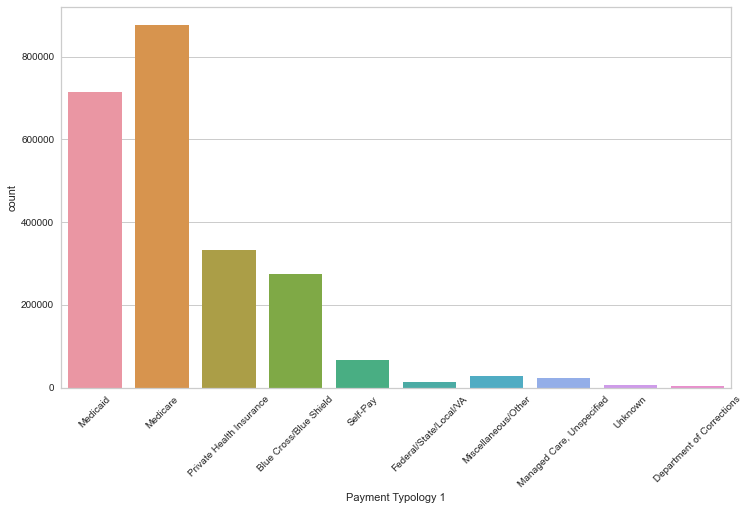

In [39]:
plt.figure(figsize=(12,7))
sns.countplot(x='Payment Typology 1', data = df)
plt.xticks(rotation=45);
df['Payment Typology 1'].value_counts()

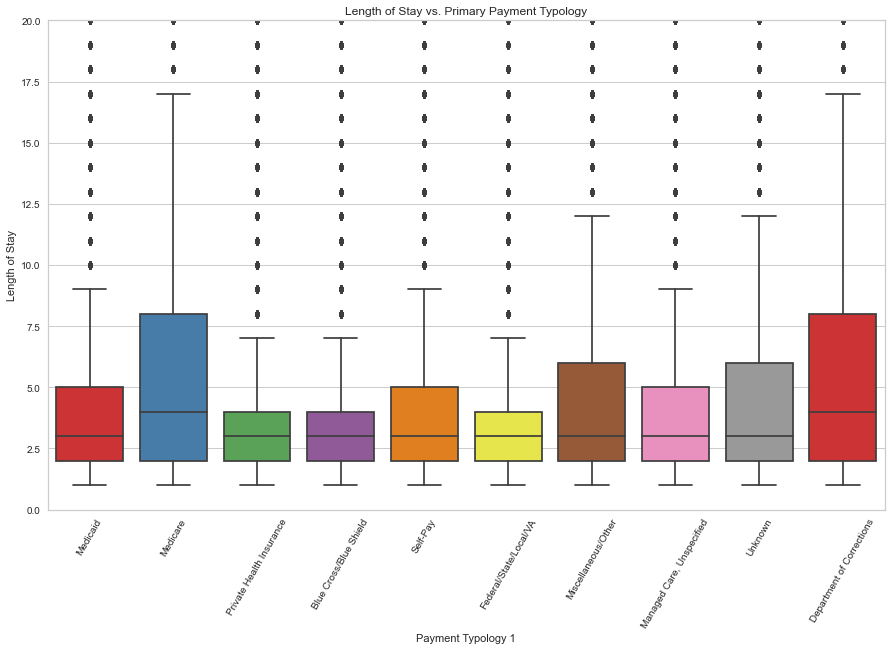

In [40]:
f, ax = plt.subplots(figsize=(15, 9))
sns.boxplot(x="Payment Typology 1", y="Length of Stay", data=df, palette='Set1')
#plt.title('Type of Patient Payments vs. Length of Stay')
ax.set(ylim=(0, 20))
plt.xticks(rotation=60)
plt.title('Length of Stay vs. Primary Payment Typology')
plt.show()

Y    1366490
N     975731
Name: Emergency Department Indicator, dtype: int64

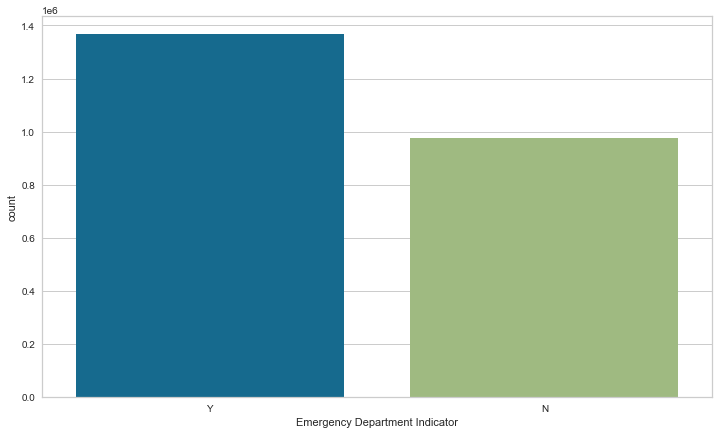

In [41]:
plt.figure(figsize=(12,7))
sns.countplot(x='Emergency Department Indicator', data = df);
df['Emergency Department Indicator'].value_counts()

Diseases and Disorders of the Circulatory System                                                        289419
Pregnancy, Childbirth and the Puerperium                                                                250907
Newborns and Other Neonates with Conditions Originating in the Perinatal Period                         231451
Diseases and Disorders of the Musculoskeletal System and Conn Tissue                                    204551
Diseases and Disorders of the Digestive System                                                          197548
Diseases and Disorders of the Respiratory System                                                        196391
Diseases and Disorders of the Nervous System                                                            141801
Infectious and Parasitic Diseases, Systemic or Unspecified Sites                                        130892
Mental Diseases and Disorders                                                                           116146
D

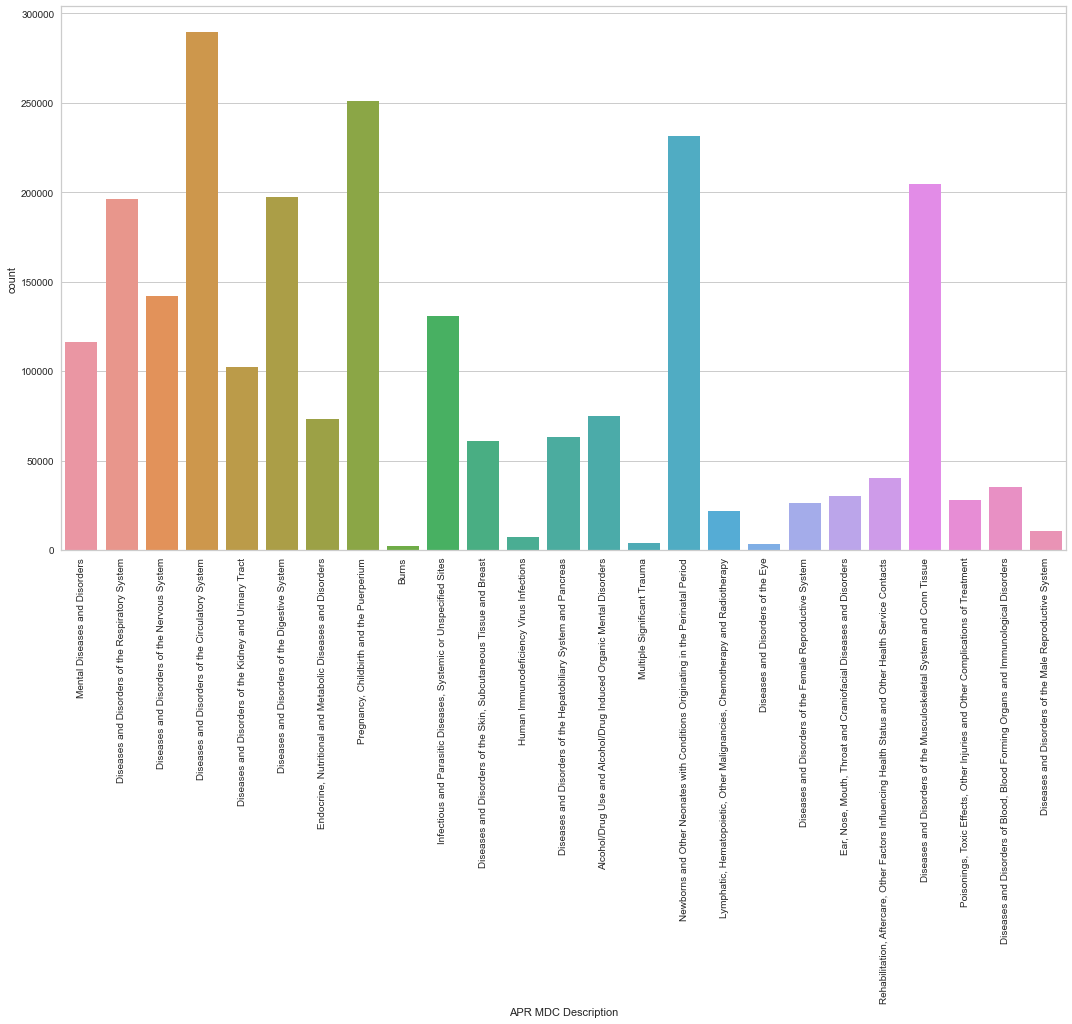

In [45]:
plt.figure(figsize=(18,10))
sns.countplot(x='APR MDC Description', data = df)
plt.xticks(rotation=90);
df['APR MDC Description'].value_counts()

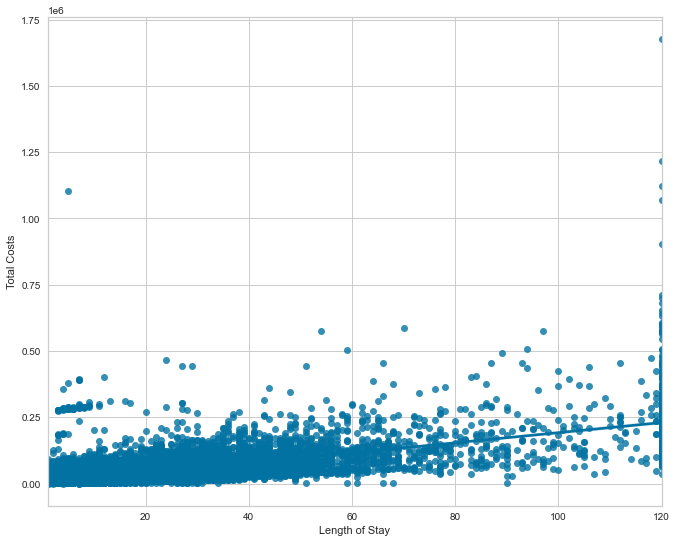

In [46]:
f, ax = plt.subplots(figsize=(11, 9))
sns.regplot(x="Length of Stay", y="Total Costs",
            data=df[0:200000]);

In [47]:
cost_df = df[['CCS Diagnosis Description','Total Costs']].groupby('CCS Diagnosis Description', as_index=False).mean()
cost_df = cost_df.sort_values(by='Total Costs', ascending=False, ignore_index=True)
display(cost_df)

CCS Diagnosis Description   Total Costs
0                                            Leukemias  82255.539414
1    Short gestation; low birth weight; and fetal g...  76227.177045
2                                         Tuberculosis  66563.343562
3                                   Spinal cord injury  62398.305067
4                        Respiratory distress syndrome  59006.072000
..                                                 ...           ...
258            OB-related trauma to perineum and vulva   6491.679341
259      Other pregnancy and delivery including normal   6419.875510
260                               Adjustment disorders   6325.364765
261          Hemolytic jaundice and perinatal jaundice   4596.355803
262                     Medical examination/evaluation   4502.010203

[263 rows x 2 columns]

In [48]:
stay_df = df[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description', as_index=False).mean()
stay_df = stay_df.sort_values(by='Length of Stay', ascending=False, ignore_index=True)
display(stay_df)

CCS Diagnosis Description  Length of Stay
0    Short gestation; low birth weight; and fetal g...       31.591017
1                        Respiratory distress syndrome       23.727660
2                                         Tuberculosis       21.489237
3                                            Leukemias       19.822296
4          Schizophrenia and other psychotic disorders       17.168233
..                                                 ...             ...
258                      Acute and chronic tonsillitis        1.870309
259                               Spontaneous abortion        1.851351
260                                  Ectopic pregnancy        1.705751
261                  Prolapse of female genital organs        1.683635
262          Hemolytic jaundice and perinatal jaundice        1.604728

[263 rows x 2 columns]

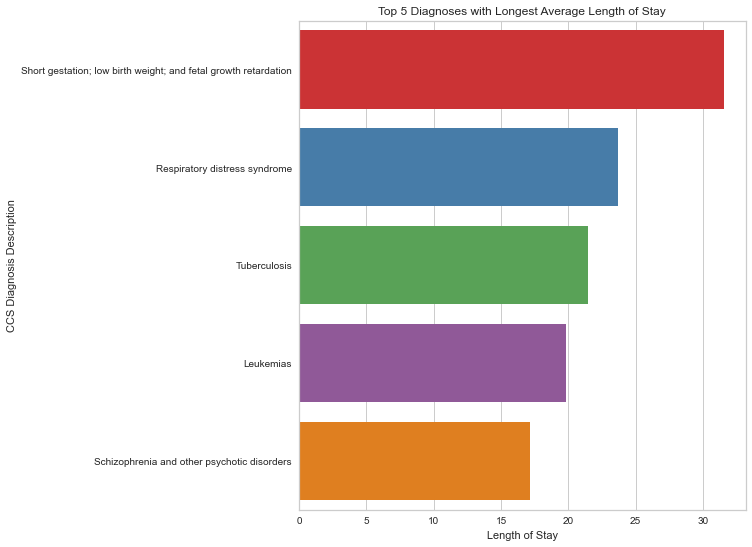

In [49]:
f, ax = plt.subplots(figsize=(8, 9))
sns.barplot(y="CCS Diagnosis Description", x="Length of Stay", data=stay_df[0:5], palette='Set1')
#plt.xticks(rotation=45)
plt.title('Top 5 Diagnoses with Longest Average Length of Stay')
plt.show()

Additionally, **AutoViz** report is generated. Autoviz may be considered as an **automated powerful EDA** in Python.

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (2342221, 33)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  10
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  3
    Number of NLP String Columns =

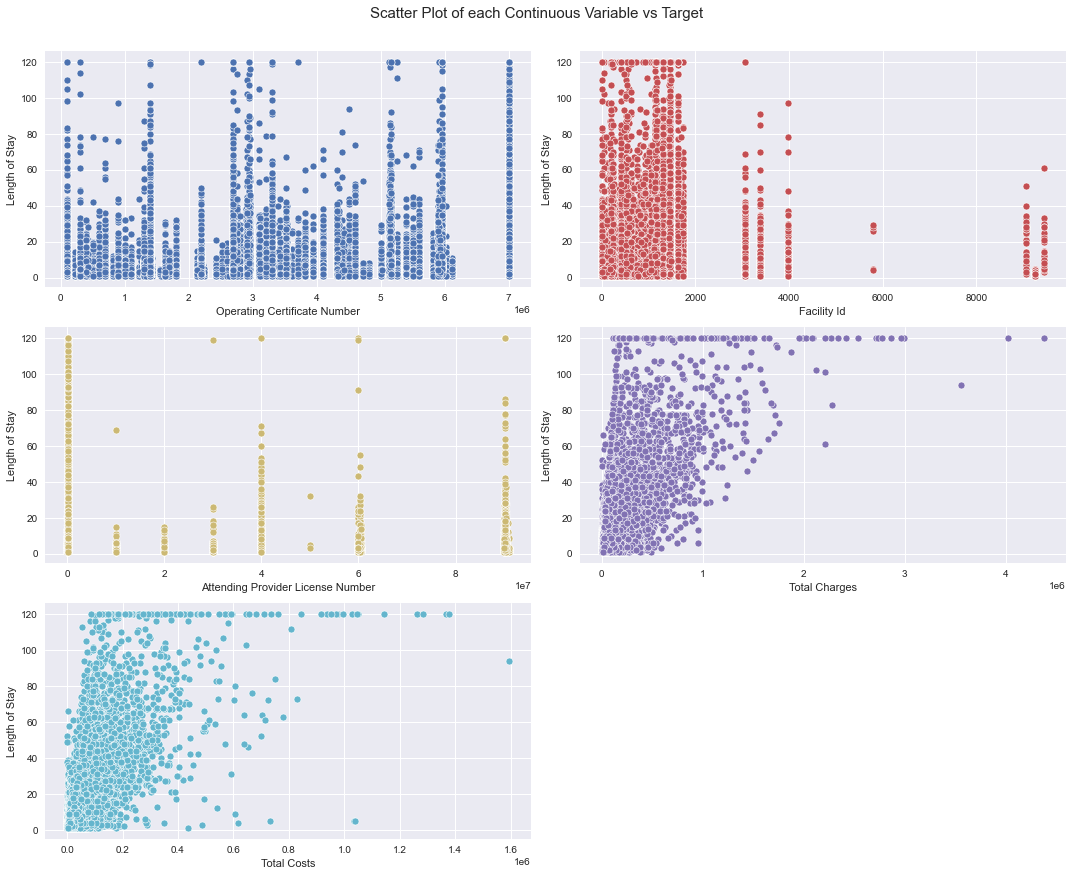

Number of All Scatter Plots = 15


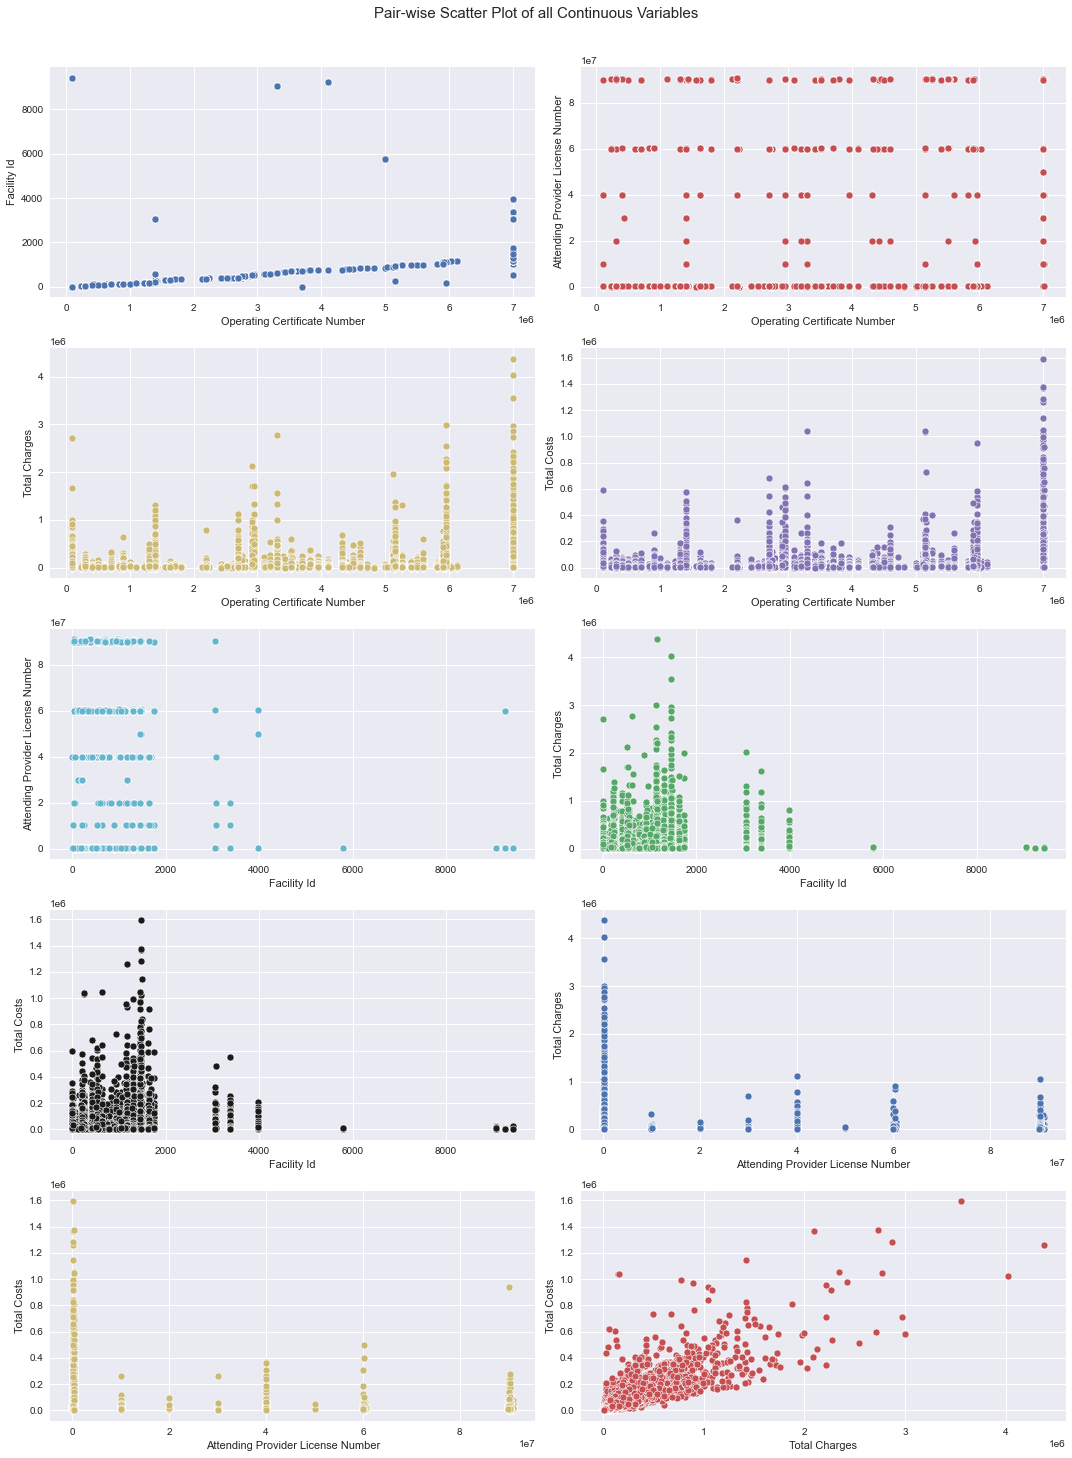

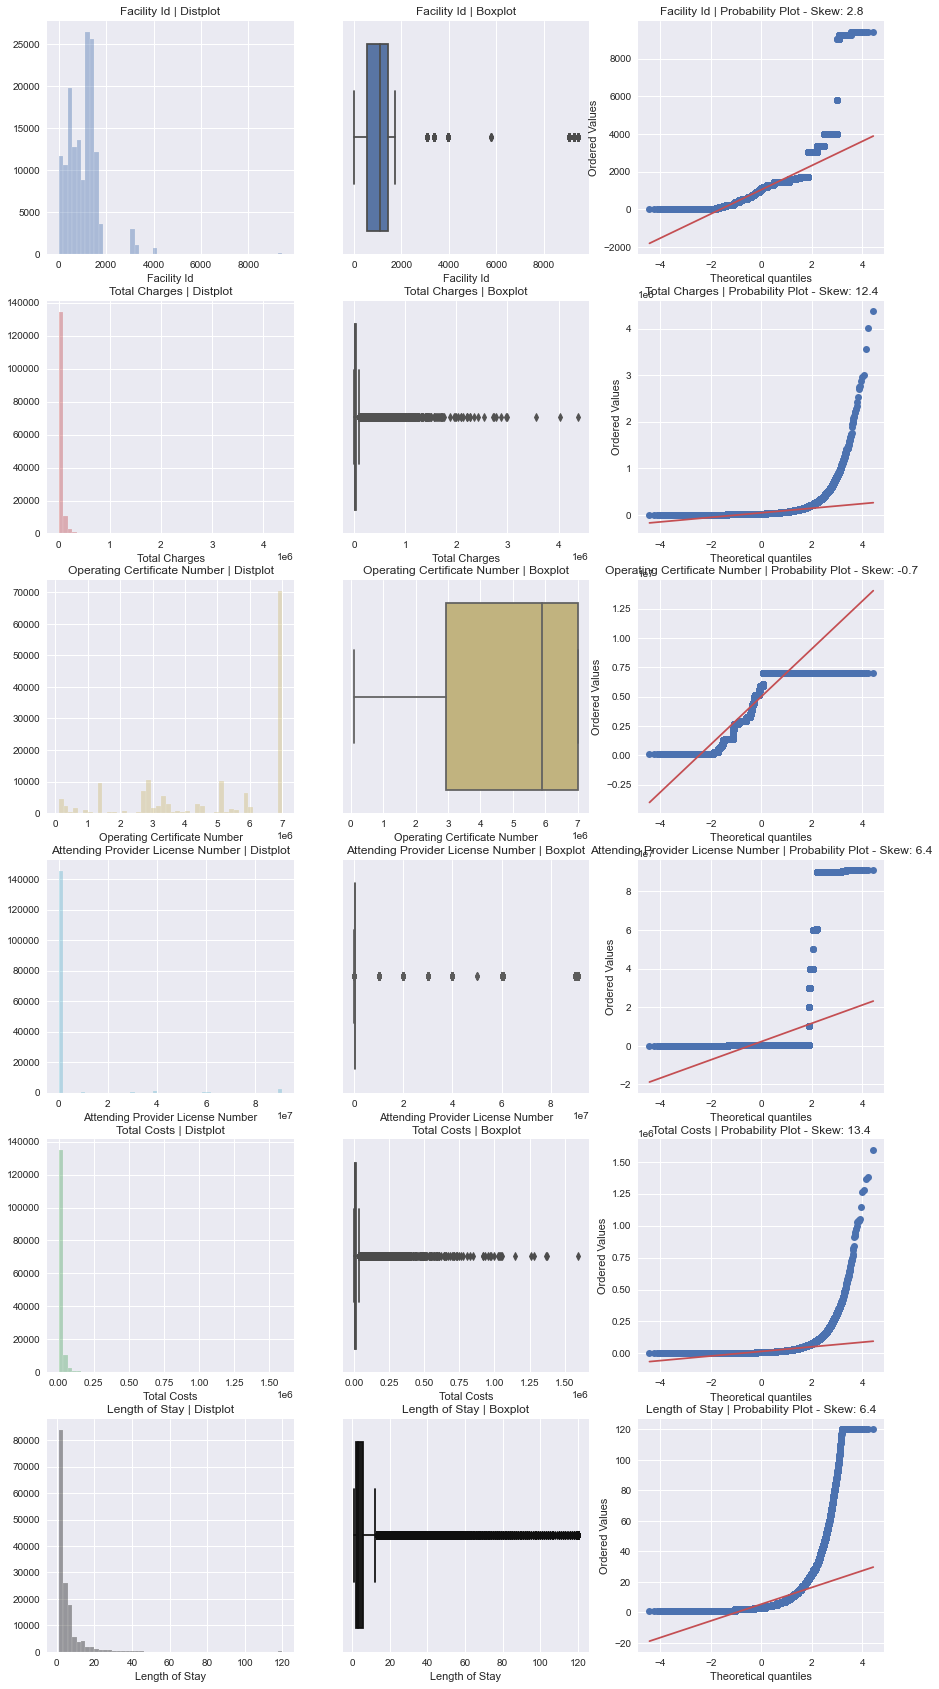

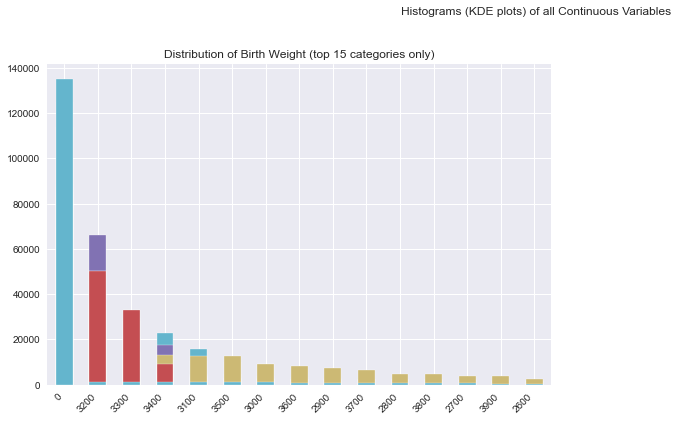

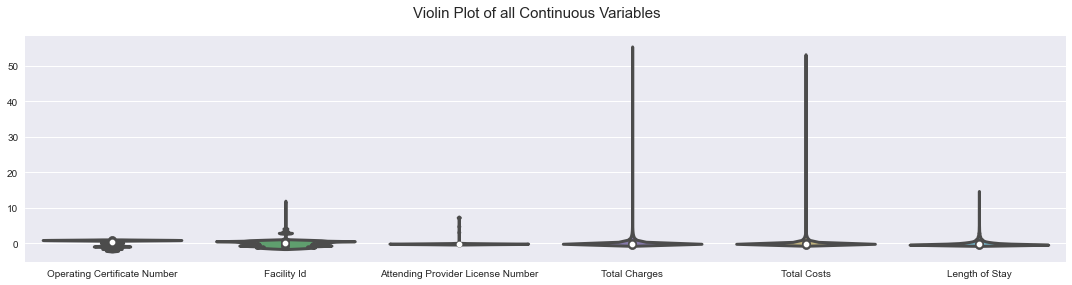

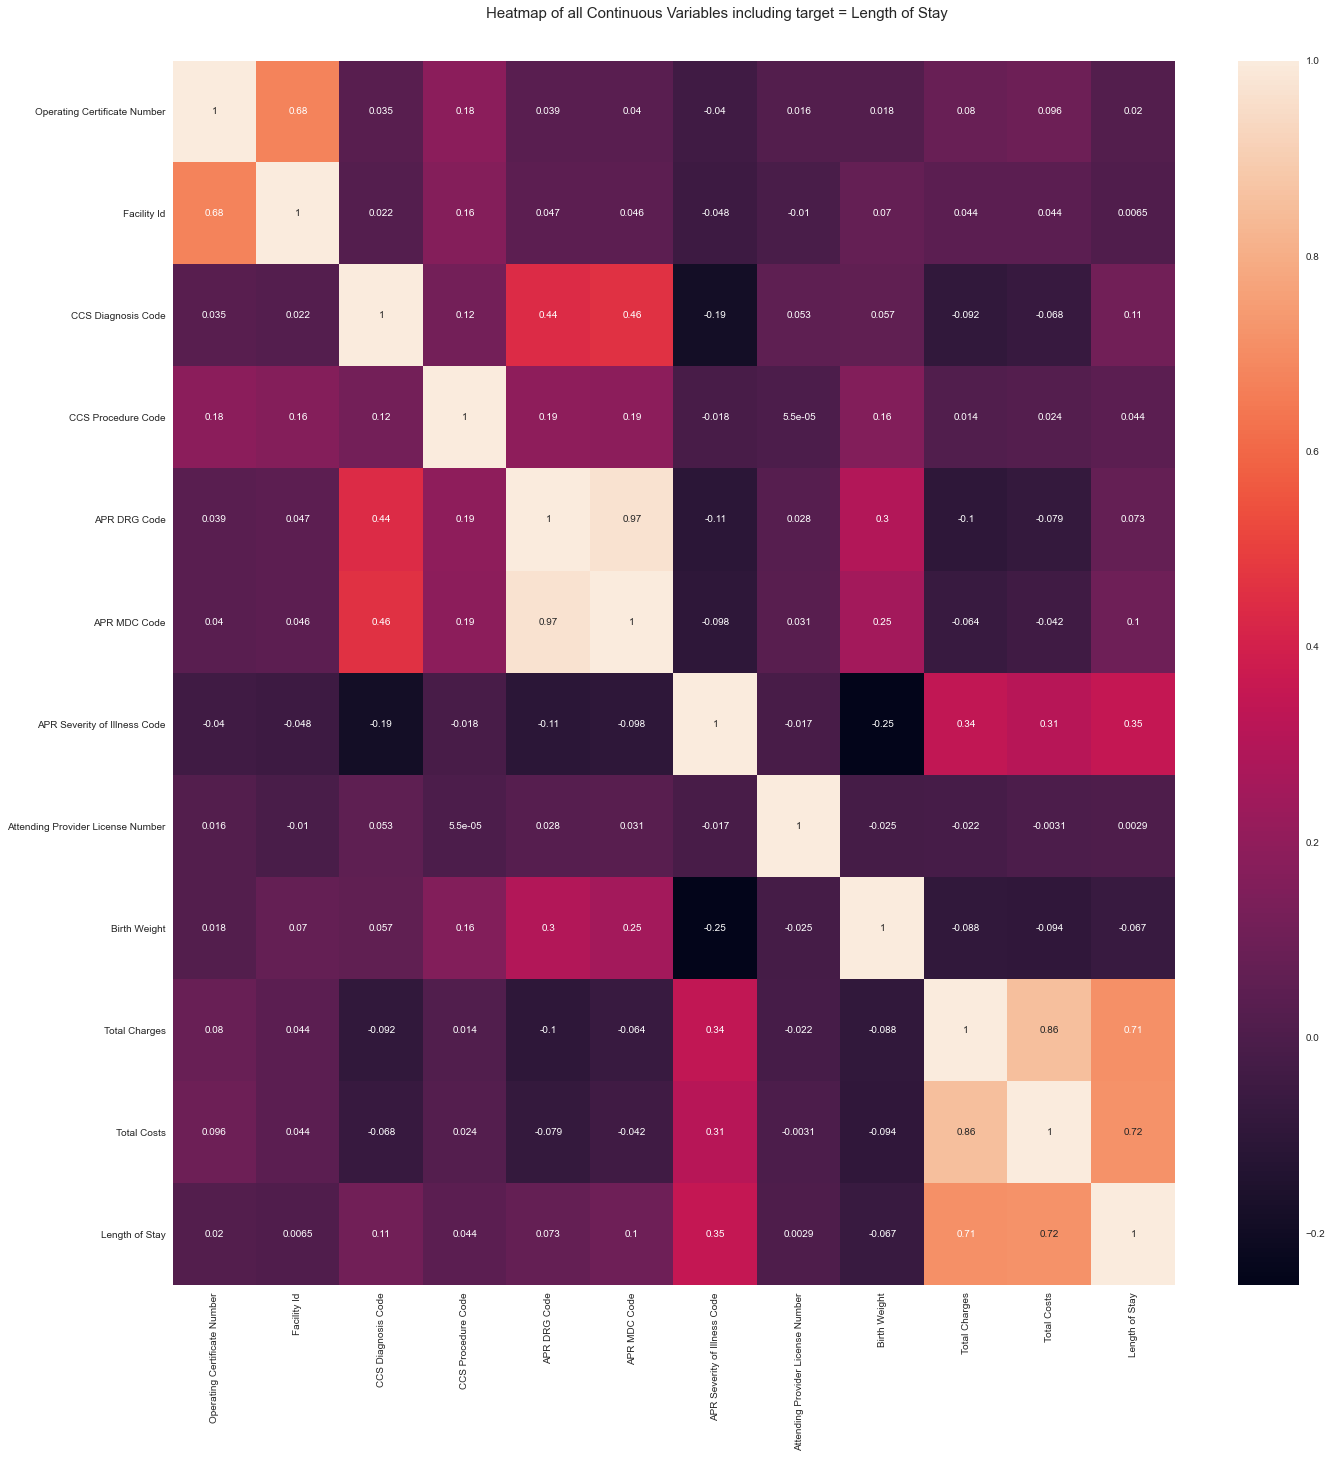

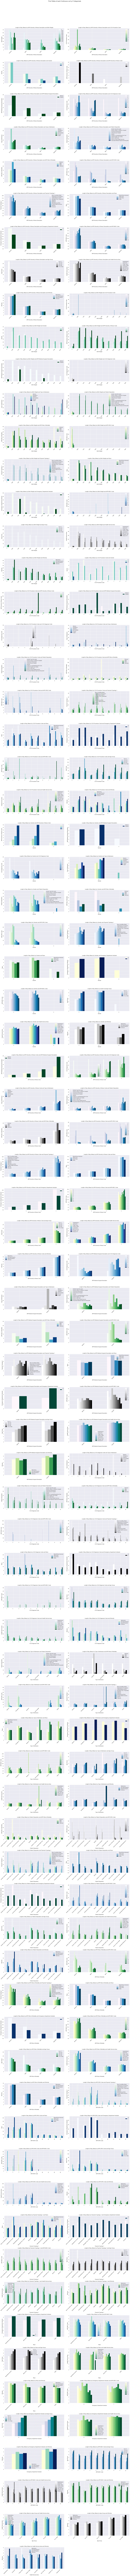

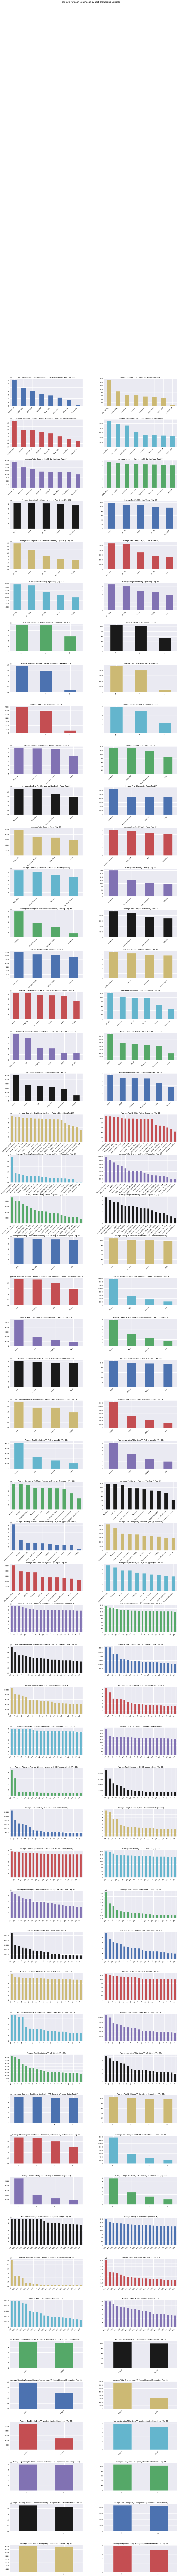

All Plots done
Time to run AutoViz (in seconds) = 133.188

 ###################### VISUALIZATION Completed ########################


In [51]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="Length of Stay",
    dfte=df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

# WordClouds

A tag cloud (**word cloud** or wordle or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. 

Tags are usually single words, and the importance of each tag is shown with font size or color. 

This format is useful for quickly perceiving the most prominent terms to determine its relative prominence. 

Bigger term means greater weight.

**CCS Diagnosis Description**

In [52]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.lower())   #removed the .lower intentionaly to keep NNP s
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [53]:
df['CCS Diagnosis Description'] = df['CCS Diagnosis Description'].apply(cleaning)

In [54]:
reports =[]

for review in df['CCS Diagnosis Description']:
    reports.append(review) 
reports = ' '.join(reports)
reports[:200]

'mood disorder mood disorder mood disorder asthma epilepsy convulsion nonspecific chest pain essential hypertension influenza epilepsy convulsion pulmonary heart disease nonspecific chest pain urinary '

In [55]:
len(reports)

63572695

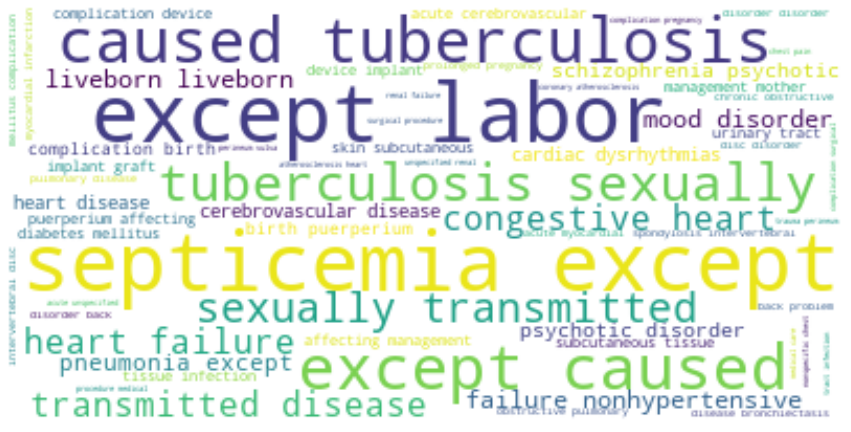

In [56]:
wordcloud = WordCloud(background_color="white", max_words=len(reports))

wordcloud.generate(reports)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [57]:
reports = reports.replace('except', '')

In [58]:
reports = reports.replace('caused', '')

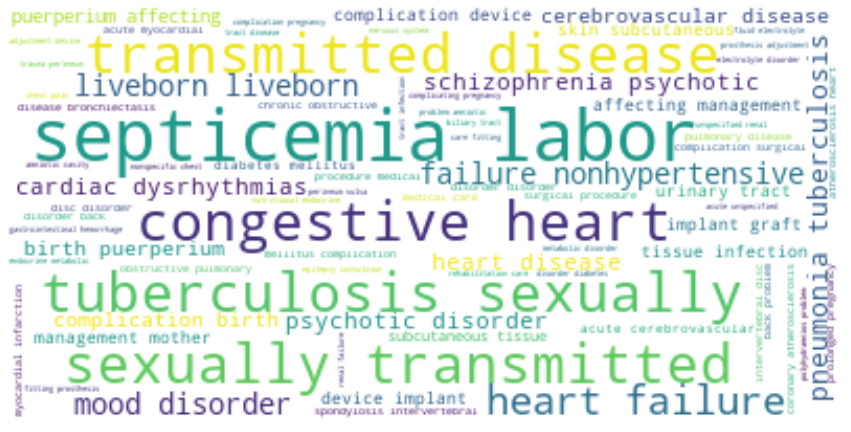

In [59]:
wordcloud = WordCloud(background_color="white", max_words=len(reports))

wordcloud.generate(reports)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**APR MDC Description**

In [60]:
df['APR MDC Description'] = df['APR MDC Description'].apply(cleaning)

In [61]:
reports =[]

for review in df['APR MDC Description']:
    reports.append(review) 
reports = ' '.join(reports)
reports[:200]

'mental disease disorder mental disease disorder mental disease disorder disease disorder respiratory system disease disorder nervous system disease disorder circulatory system disease disorder circula'

In [62]:
len(reports)

98266090

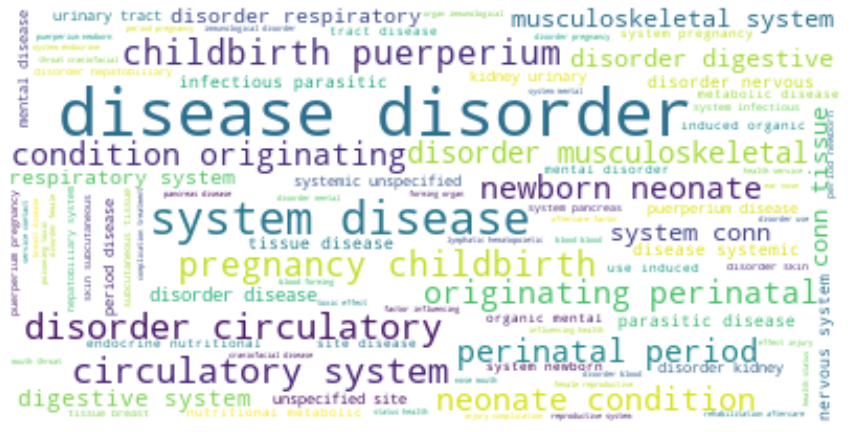

In [63]:
wordcloud = WordCloud(background_color="white", max_words=len(reports))

wordcloud.generate(reports)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Length of Stay Estimation

Before starting the **prediction** process, some columns will be dropped - I do not expect them to have any effect on the precision of the prediction, or the info they are expected to provide are already in other columns. Those columns are:

Zip Code - 3 digits

Facility Name

CCS Diagnosis Description 

CCS Procedure Description 

APR DRG Description 

APR MDC Description 

APR Severity of Illness Description

Discharge Year 

Operating Certificate Number 

Ethnicity 

Hospital County 

Birth Weight 

Attending Provider License Number 

Patient Disposition

In [64]:
df.shape

(2342221, 33)

In [65]:
df1 = df.drop(['APR Severity of Illness Description'], axis=1) 

In [70]:
df1 = df1.drop(['Zip Code - 3 digits'], axis=1) 
df1 = df1.drop(['Facility Name'], axis=1) 
df1 = df1.drop(['CCS Diagnosis Description'], axis=1) 
df1 = df1.drop(['CCS Procedure Description'], axis=1) 
df1 = df1.drop(['APR DRG Description'], axis=1) 
df1 = df1.drop(['APR MDC Description'], axis=1) 
df1 = df1.drop(['Discharge Year'], axis=1) 
df1 = df1.drop(['Operating Certificate Number'], axis=1) 
df1 = df1.drop(['Ethnicity'], axis=1) 
df1 = df1.drop(['Hospital County'], axis=1) 
df1 = df1.drop(['Birth Weight'], axis=1) 
df1 = df1.drop(['Attending Provider License Number'], axis=1) 
df1 = df1.drop(['Patient Disposition'], axis=1) 

In [71]:
df1.shape

(2342221, 19)

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342221 entries, 0 to 2346759
Data columns (total 19 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Health Service Area               object 
 1   Facility Id                       float64
 2   Age Group                         object 
 3   Gender                            object 
 4   Race                              object 
 5   Length of Stay                    int32  
 6   Type of Admission                 object 
 7   CCS Diagnosis Code                int64  
 8   CCS Procedure Code                int64  
 9   APR DRG Code                      int64  
 10  APR MDC Code                      int64  
 11  APR Severity of Illness Code      int64  
 12  APR Risk of Mortality             object 
 13  APR Medical Surgical Description  object 
 14  Payment Typology 1                object 
 15  Abortion Edit Indicator           object 
 16  Emergency Department Indicator    ob

In [73]:
df2 = pd.get_dummies(df1)

In [74]:
df2.shape

(2342221, 54)

<AxesSubplot:>

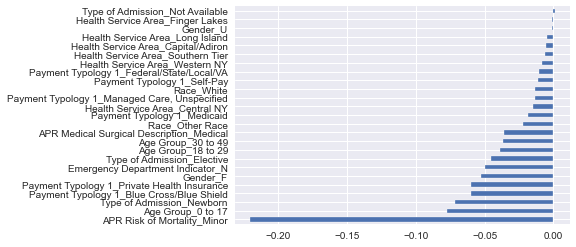

In [77]:
df2.corr()['Length of Stay'].sort_values().head(25).plot.barh()

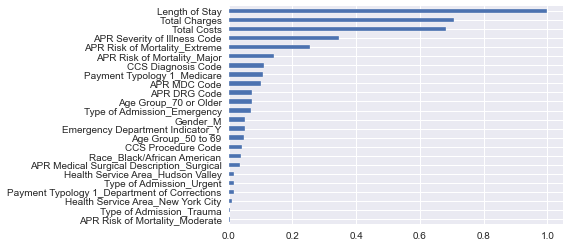

In [79]:
df2.corr()['Length of Stay'].sort_values().tail(25)[:-1].plot.barh();

**Train-Test-Split**

I already proved in a scatter plot (and shown above) that length of stay is highly correlated to cost and charges, so I dropped those columns.

In [81]:
X = df2.drop(['Length of Stay','Total Charges','Total Costs'], axis=1)
y = df2[['Length of Stay']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Linear Regression**

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [84]:
lm = LinearRegression()

In [85]:
lm.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = lm.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
eval_metrics(y_test, y_pred)

r2_score: 0.19134278284783268 
 mae: 3.545071263699231 
 mse: 52.350168975516965 
 rmse: 7.235341662666454


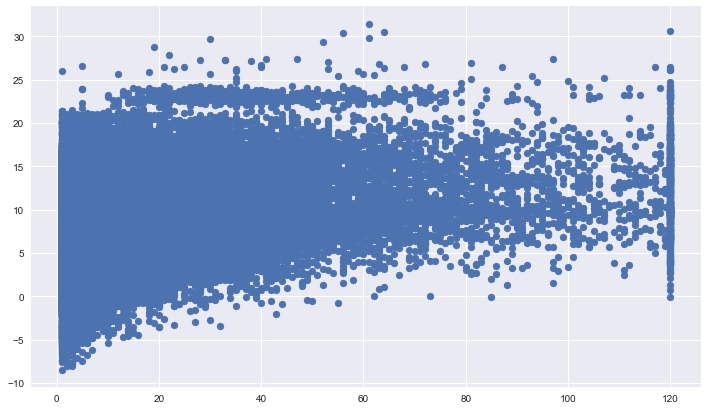

In [90]:
plt.figure(figsize=(12,7))
plt.scatter(y_test, y_pred); 

**Random Forest Regressor**

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf_reg = RandomForestRegressor()

In [ ]:
rf_reg.fit(X_train, y_train)

In [ ]:
y_pred = rf_reg.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

**XGBoost Regressor**

In [94]:
import xgboost

In [95]:
model_xg = xgboost.XGBRegressor()
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
y_pred = model_xg.predict(X_test)

In [97]:
eval_metrics(y_test, y_pred)

r2_score: 0.439622154218247 
 mae: 2.731882187377653 
 mse: 36.27726840814276 
 rmse: 6.023061381734604
